### Setup

 - check for gpu status

In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse
from cellpose import models, core

use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

# call logger_setup to have output of cellpose written
from cellpose.io import logger_setup
logger_setup();

c:\Users\CaiLab\anaconda3\envs\ImageAnalysis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>>> GPU activated? 1
2023-12-07 00:23:05,078 [INFO] WRITING LOG OUTPUT TO C:\Users\CaiLab\.cellpose\run.log
2023-12-07 00:23:05,079 [INFO] 
cellpose version: 	2.2.2 
platform:       	win32 
python version: 	3.8.17 
torch version:  	1.12.0


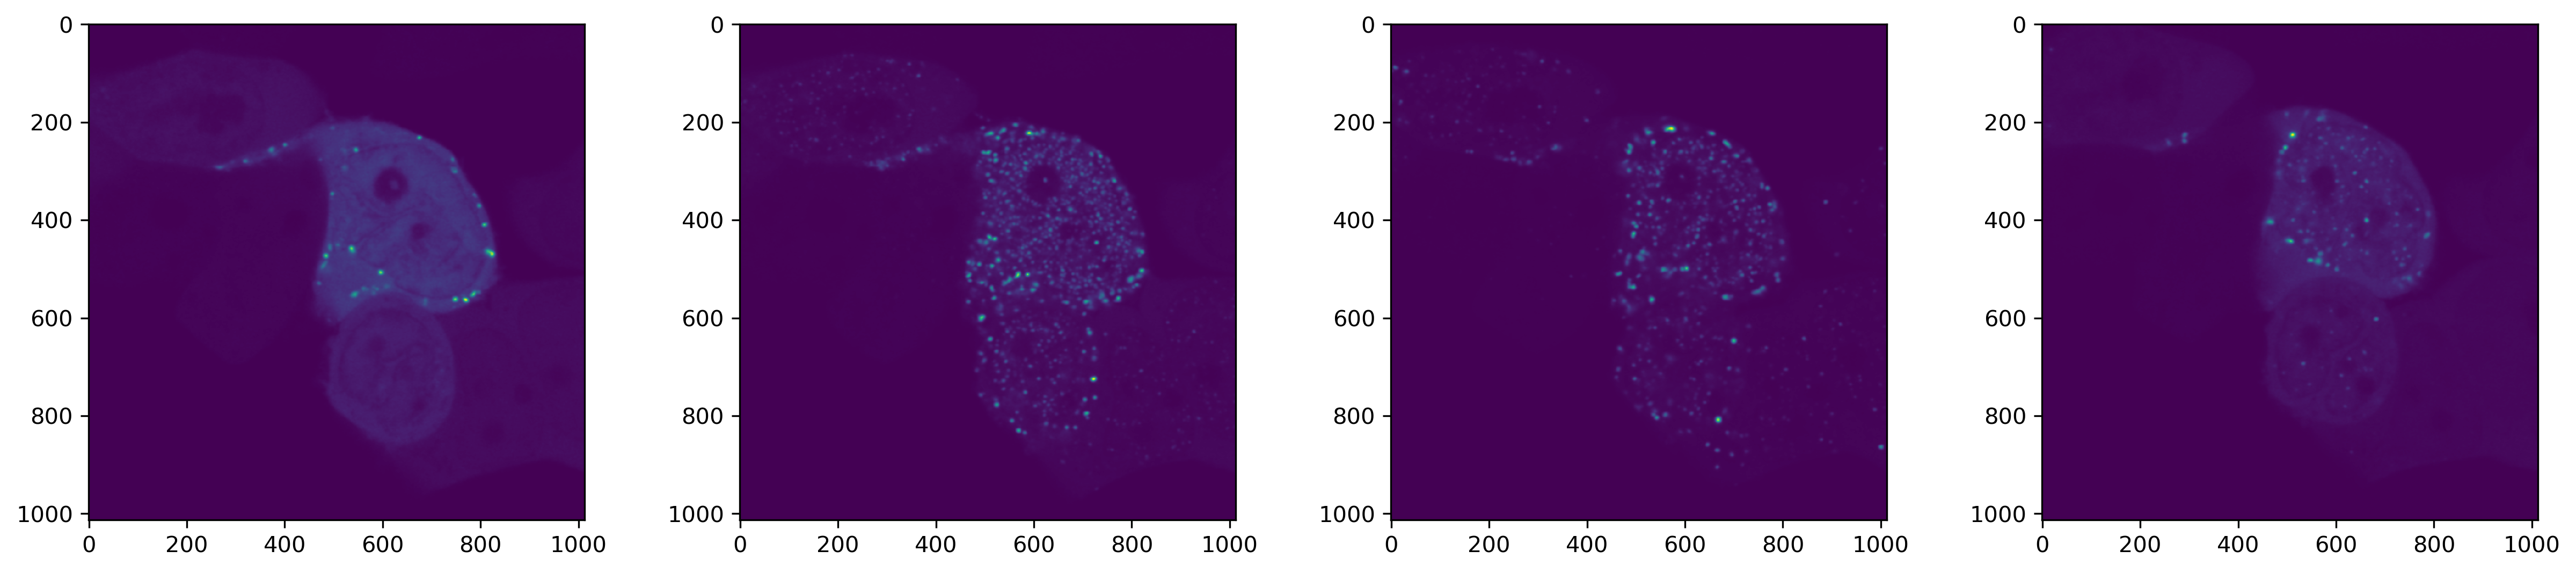

In [2]:
files = ["file.ome.tif","file2.ome.tif","file10.ome.tif","file20.ome.tif"]
imgs = [skimage.io.imread(f) for f in files]
nimg = len(imgs)

plt.figure(figsize=(20,4))
for k,img in enumerate(imgs):
  plt.subplot(1,4,k+1)
  plt.imshow(img)

In [3]:
import napari

viewer = napari.view_image(skimage.io.imread("./file_full.ome.tif"), colormap='red')

2023-12-07 00:23:18,568 [INFO] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-12-07 00:23:18,570 [INFO] NumExpr defaulting to 8 threads.
2023-12-07 00:23:22,843 [INFO] VERSION = 2.3.0

2023-12-07 00:23:22,845 [INFO] The bioformats_package.jar is not present.Can only use Python backend for reading/writing images.
2023-12-07 00:23:23,851 [INFO] Resource 'XMLSchema.xsd' is already loaded
